# CH04

## 파일 설명
| 파일명 | 파일 용도 | 관련 절 | 페이지 |
|:--   |:--      |:--    |:--      |
| gradient_1d.py | 수치 미분으로 기울기를 구합니다. | 4.3.2 수치 미분의 예 | 125 |
| gradient_2d.py | 수치 미분으로 기울기를 구합니다(두 편미분을 동시에 계산). | 4.4 기울기 | 129 |
| gradient_method.py | 경사하강법의 갱신 과정을 보여줍니다. | 4.4.1 경사법(경사 하강법) | 132 |
| gradient_simplenet.py | simpleNet 클래스 | 4.4.2 신경망에서의 기울기 | 134 |
| train_neuralnet.py | 미치배치 방식으로 학습하고 시험 데이터로 평가합니다. | 4.5.2 미니배치 학습 구현하기 / 4.5.3 시험 데이터로 평가하기 | 141, 143 |
| two_layer_net.py | 2층 신경망 클래스 | 4.5.1 2층 신경망 클래스 구현하기 | 137 |

## 4장 신경망 학습
이번 장의 주제는 신경망 학습입니다. 여기서 **학습**이란 훈련 데이터로부터 가중치 매개변수의
최적값을 자동으로 획득하는 것을 뜻합니다. 이번 장에서는 신경망이 학습할 수 있도록 해주는
**지표**인 손실 함수를 소개합니다. 이 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를
찾는 것이 학습의 목표입니다. 이번 장에서는 손실 함수의 값을 가급적 작게 만드는 기법으로,
함수의 기울기를 활용하는 경사법을 소개합니다.

## 목차
```
4.1 데이터에서 학습한다! 
__4.1.1 데이터 주도 학습 
__4.1.2 훈련 데이터와 시험 데이터 
4.2 손실 함수 
__4.2.1 평균 제곱 오차 
__4.2.2 교차 엔트로피 오차 
__4.2.3 미니배치 학습 
__4.2.4 (배치용) 교차 엔트로피 오차 구현하기 
__4.2.5 왜 손실 함수를 설정하는가? 
4.3 수치 미분 
__4.3.1 미분 
__4.3.2 수치 미분의 예 
__4.3.3 편미분 
4.4 기울기 
__4.4.1 경사법(경사 하강법) 
__4.4.2 신경망에서의 기울기 
4.5 학습 알고리즘 구현하기 
__4.5.1 2층 신경망 클래스 구현하기
__4.5.2 미니배치 학습 구현하기 
__4.5.3 시험 데이터로 평가하기
```

## 이번 장에서 배운 내용
* 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.
* 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
* 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
* 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
* 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다.
* 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
* 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다. 한편, 다음 장에서 구현하는 (다소 복잡한) 오차역전파법은 기울기를 고속으로 구할 수 있다.


## 4.1 데이터에서 학습한다

### 4.1.1 데이터 주도 학습

* 기계학습의 중심에는 **데이터**가 존재

#### 문제 해결 방법 (패턴 탐색 방법 - 예: 숫자 '5' 인식)
1. 사람의 경험과 직관을 단서로 시행착오를 거듭하면서 규칙 결정
2. 이미지에서 **특징**(예: SIFT, HOG 등)을 추출하여 특징의 패턴을 기계학습(SVM, KNN 등) 기술로 학습
 - 특징으로부터 규칙을 찾는 역할을 **기계**가 담당
 - 여전히 이미지->특징은 **사람**이 설계
3. 이미지에 포함된 중요한 특징까지도 **기계**가 스스로 학습(신경망/딥러닝): 종단단 기계학습 (end-to-end ML)
 - 참고: [end-to-end 학습의 장단점](https://talkingaboutme.tistory.com/entry/MLY-end-to-end-%ED%95%99%EC%8A%B5%EC%9D%98-%EC%9E%A5%EB%8B%A8%EC%A0%90)
 
### 4.1.2 훈련 데이터와 시험 데이터
* 훈련 데이터(training data): 모델(알고리즘)의 최적 매개변수를 찾을 때 사용
* 시험 데이터(test data): 앞서 훈련한 모델의 실력(**범용 능력**)을 평가
 - 범용 능력: 아직 보지 못한 데이터로도 문제를 올바르게 풀어내는 능력
* 오버피팅(overfitting): 한 데이터셋에만 지나치게 최적화된 상태 (이를 피하는게 ML에서의 중요한 과제!)

## 4.2 손실 함수
* 손실 함수(loss function): 신경망 학습(또는 기계학습)에서 최적의 매개변수를 탐색하기 위해 사용하는 지표
* 참고: 원-핫 인코딩: 정답 표기 등에서 한 원소만 1로, 그 외는 0으로 나타내는 표기법

### 4.2.1 평균 제곱 오차 (mean squared error, MSE)
* 평균 제곱 오차: 각 원소의 출력(추정 값)과 정답 레이블(참 값)의 차이의 제곱의 총합

### 4.2.2 교차 엔트로피 오차 (cross entropy error, CEE)
* 교차 엔트로피 오차: 정답일때의 추정의 자연로그 (정답예측값이 높을수록 손실함수가 작은 값이 나오도록 -1 곱해서 사용)

### 4.2.3 미니배치 학습
* 미니배치(mini-batch): 전체 훈련데이터 중 일부만을 사용하여 학습
* 전체에 대한 손실함수 계산에 시간이 걸릴 경우 전체의 '근사치'로 이용 (TV 시청률 조사 등에 무작위 1,000가구 대상 계측하는 경우와 유사하게 이해)

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

### 4.2.5 왜 (정학도 대신에) 손실함수를 설정하는가?
* 신경망(ML)에서의 학습 - 손실함수의 값을 가능한 한 작게 하는 매개변수 값을 찾는 것
* 매개변수(의 손실함수)의 미분(정확히는 기울기)값을 단서로 매개변수 값을 서서히 갱신하는 과정을 반복
* 손실함수의 미분 - '가중치 매개변수 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하나'라는 의미
 - 미분값이 음수(양수): 가중치 매개변수를 양(음)의 방향으로 변화시켜 손실함수 값을 줄인다
 - 미분값이 0이면 가중치 매개변수의 갱신 방향을 찾을 수 없어 거기서 멈추게 됨
* 정확도를 지표로 삼아서는 안되는 이유 - 매개변수(에 대한 정확도)의 미분이 대부분 0이 되어 매개변수를 갱신할 수 없음

In [1]:
import numpy as np

# 4.2.1 평균 제곱 오차 (MSE)

# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

#예1: '2'일 확률이 가장 높다고 추정함 (0.6)
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print("예1의 MSE:", mean_squared_error(np.array(y1), np.array(t)))

#예2: '7'일 확률이 가장 높다고 추정함 (0.6)
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print("예2의 MSE:", mean_squared_error(np.array(y2), np.array(t)))

예1의 MSE: 0.09750000000000003
예2의 MSE: 0.5975


In [2]:
# 4.2.2 교차 엔트로피 오차 (CEE)

def cross_entropy_error(y, t):
    delta = 1e-7 # y=0이 입력될때 -inf가 발생하지 않게 하기 위해 작은 값을 더함
    return -np.sum(t * np.log(y + delta))

# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#예1: '2'일 확률이 가장 높다고 추정함 (0.6)
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print("예1의 CEE:", cross_entropy_error(np.array(y1), np.array(t)))

#예2: '7'일 확률이 가장 높다고 추정함 (0.6)
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print("예2의 CEE:", cross_entropy_error(np.array(y2), np.array(t)))

예1의 CEE: 0.510825457099338
예2의 CEE: 2.302584092994546


In [3]:
# 4.2.3 미니배치 학습

########
# MNIST 데이터셋 읽어오기

import sys, os
sys.path.append(os.pardir)
import numpy as np
from src.dataset.mnist import load_mnist

# one_hot_label=True: 정답(t)를 원-핫 인코딩으로 불러옴
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

########
# 훈련 데이터에서 무작위로 10장만 빼내기

# (응용) 같은 결과가 재현될 수 있도록 추가
np.random.seed(0)

train_size = x_train.shape[0]
batch_size = 10
# train_size(예: 60000) 중 무작위로 batch_size(예: 10)개를 골라냄
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

[ 2732 43567 42613 52416 45891 21243 30403 32103 41993 57043]


In [4]:
# 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

# 데이터가 하나인 경우와 배치로 묶여 입력될 경우 모두를 처리할 수 있도록 구현
def cross_entropy_error(y, t):
    if y.ndim == 1: # 출력이 1개(1차원이면) (1, y.size) 형태의 2차원 배열로 형상을 변경
        t = t.reshape(1, t.size) 
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

# 정답 레이블이 원-핫 인코딩이 아니라 숫자 레이블로 주어졌을때 구현 방법
def cross_entropy_error2(y, t):
    if y.ndim == 1: # 출력이 1개(1차원이면) (1, y.size) 형태의 2차원 배열로 형상을 변경
        t = t.reshape(1, t.size) 
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    # t * np.log(y) -> np.log(y[0~size-1, t])로 변환
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 4.3 수치 미분
* 해석적 미분: 수식을 전개해 미분 계산. 오차 없이 '진정한 미분'값을 구할 수 있음
* 수치 미분: 작은 차분으로 미분하는 것. 근사값이긴 해도 미분식 계산없이도 미분값을 구할 수 있음 

In [5]:
# 4.3.1 미분

# 미분의 이론적 원리는 x의 '작은 변화'가 f(x)를 얼마나 변화시키느냐를 의미하지만,
# 수치를 너무 작게 할 경우 '반올림 오차(rounding error)' 문제 발생

print(np.float32(1e-50)) # 컴퓨터에서 0으로 간주됨

# 나쁜 구현 예 - h가 작아 실제 변화정도가 반영안됨
def numerical_diff_bad(f, x):
    h = 1e-50
    return (f(x+h) - f(x)) / h

# 첫번째 개선: 미세한 값 h 를 1e-50 -> 1e-4 정도의 값으로 사용

# 두번째 개선: 전방 차분(f(x+h) - f(x)) 만으로 발생할 수 있는 오차를 줄이기 위해 
# 중심 차분(또는 중앙 차분, f(x+h) - f(x-h))

# 위의 두 개선점을 적용해 수치 미분을 다시 구현
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

0.0


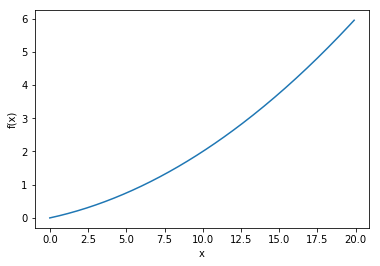

In [8]:
# 4.3.2 수치 미분의 예

# y = 0.01x^2 + 0.1x 를 파이썬으로 구현
def function_1(x):
    return 0.01*x**2 + 0.1*x

# 위의 함수를 그래프로 그려보자
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1간격으로 배열 x를 만든다
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [9]:
# 수치미분으로 x=5, 10일때 미분값 계산
print("y'(5) =", numerical_diff(function_1, 5))
print("y'(10) =", numerical_diff(function_1, 10))

# -> y'(x)의 해석적 해는 0.02x+0.1 로 y'(5)=0.2, y'(10)=0.3 이지만 수치 미분도 오차가 매우 작음

y'(5) = 0.1999999999990898
y'(10) = 0.2999999999986347


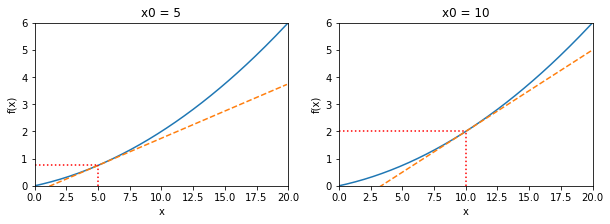

In [10]:
# 수치미분값을 기울기로 하는 직선을 그려보자 (ch04/gradient_1d.py 참고)

def tangent_line(f, x):
    d = numerical_diff(f, x) # x위치에서의 기울기 계산 
    y = f(x) - d*x # x위치에서 d기울기로 직선을 그을때 (x, f(x))를 지나갈 수 있도록 하는 y값 계산
    return lambda t: d*t + y # t일때 x축 입력값일때 기울기 직선 표시용 y값 계산 

plt.subplots(1, 2, figsize=(10,3))

for idx, x0 in enumerate([5, 10]):
    plt.subplot(1, 2, idx+1)

    y0 = function_1(x0) # x0에 대한 y값

    tf = tangent_line(function_1, x0)
    y2 = tf(x)

    x = np.arange(0.0, 20.0, 0.1)
    y = function_1(x)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.plot(x, y) # 원래 식
    plt.plot(x, y2, linestyle="--") # x0 위치에서의 접선
    plt.plot([0, x0], [y0, y0], linestyle=":", color='r') # (x0, y0) 위치 표시용
    plt.plot([x0, x0], [0, y0], linestyle=":", color='r') # (x0, y0) 위치 표시용
    plt.xlim(0,20)
    plt.ylim(0,6)
    plt.title("x0 = %d" % x0)

plt.show()

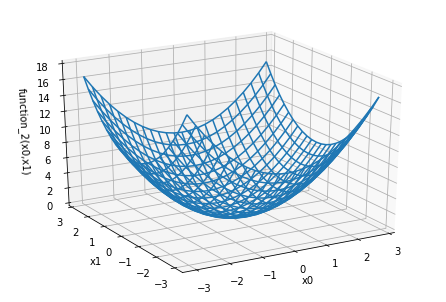

In [33]:
# 4.3.3 편미분

def function_2(x):
    return np.sum(x**2, axis=0)
    # 또는 return x[0]**2 + x[1]**2

########
# 그림 4-8 그려보자 (ch04/gradient_2d.py 참조)
from mpl_toolkits.mplot3d import Axes3D

x0 = np.arange(-3., 3., 0.25)
x1 = np.arange(-3., 3., 0.25)
X, Y = np.meshgrid(x0, x1)

# 2차원 meshgrid 좌표에 대응하는 각 X, Y 변수를 2변수 함수에 입력하기 위해 1차원으로 펼침
X = X.flatten()
Y = Y.flatten()

Z = function_2(np.array([X, Y]))

# 계산된 함수값을 포함하여 meshgrid 형태에 맞게 원래 2차원 배열 형태로 재변환 
X = X.reshape(len(x0), len(x1))
Y = Y.reshape(len(x0), len(x1))
Z = Z.reshape(len(x0), len(x1))

fig = plt.figure()
ax = Axes3D(fig)
#ax = fig.gca(projection='3d')

#ax.plot_surface(X, Y, Z)
ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('function_2(x0,x1)')

ax.view_init(elev=25, azim=-120) # 3d plot의 viewing angle을 교재와 비슷하게 변경
    
plt.show()


In [32]:
########
# 기존의 수치 미분함수로 각 변수별 편미분 구하기

# x0=3, x1=4일때 x0에 대한 편미분 구하기
def function_tmp1(x0):
    return x0**2.0 + 4.0**2.0 # x1값은 고정시킴

print(numerical_diff(function_tmp1, 3.0)) # 6에 가까운 값

# x0=3, x1=4일때 x1에 대한 편미분 구하기
def function_tmp2(x1):
    return 3.0**2.0 + x1**2.0 # x0값은 고정시킴

print(numerical_diff(function_tmp2, 4.0)) # 8에 가까운 값

6.00000000000378
7.999999999999119


## 4.4 기울기

* 기울기(gradient): 각 변수별 편미분을 벡터로 정리한 것

In [47]:
# 기울기를 수치적으로 구현
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001, 차분을 적당히 작게
    grad = np.zeros_like(x) # x와 형상이 같고 원소가 모두 0인 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    
    return grad

# 특정 위치에서의 기울기(gradient) 계산
print(numerical_gradient(function_2, np.array([3.0, 4.0]))) # [6, 8]
print(numerical_gradient(function_2, np.array([0.0, 2.0]))) # [0, 4]
print(numerical_gradient(function_2, np.array([3.0, 0.0]))) # [6, 0]

# 참고: numpy 출력시엔 수치를 '보기 쉽도록' 가공함 => 배열의 각 원소를 출력해서 확인
print(numerical_gradient(function_2, np.array([3.0, 4.0]))[0],
      numerical_gradient(function_2, np.array([3.0, 4.0]))[1])

[6. 8.]
[0. 4.]
[6. 0.]
6.00000000000378 7.999999999999119


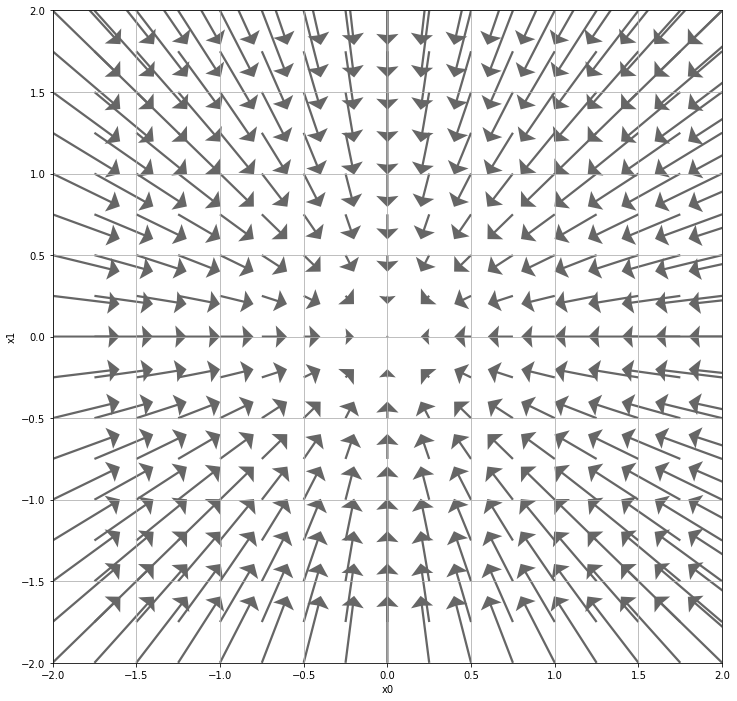

In [48]:
# 기울기의 의미 이해를 위해 기울기의 결과에 마이너스를 붙이 벡터를 그려보자
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

# 여러 항목이 배열로 입력들어올때에도 대응
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)

X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]))

plt.figure(figsize=(12,12))
# quiver(): Plot a 2-D field of arrows. (quiver: 화살통이라는 뜻이 있나봄)
plt.quiver(X, Y, -grad[0], -grad[1],
           angles='xy', # (x,y) -> (x+u, y+v)
           color="#666666",
           headwidth=10, scale=40,
          )
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
#plt.legend()
plt.draw()
plt.show()

### 4.4.1 경사법(경사 하강법)
* 경사법: 손실 함수가 복잡하고 매개변수 공간이 광대하여 어디가 최솟값인지 짐작할 수 없을 때, 기울기를 잘 이용해 함수의 최솟값을 찾으려는 것
* 경사법에서의 **기울기**: 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표
* 복잡한 함수의 경우 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분
* 경사법: 현 위치에서 기울기 방향으로 일정 거리만큼 이동 후 다시 기울기를 구하는 과정을 반복하면서 함수의 값을 점차 줄이는 것
* 학습률(learning rate): 한 번의 학습으로 매개변수 값을 얼마나 갱신하느냐를 정하는 것
 - 0.01이나 0.001 등 미리 특정값 정해 사용. 너무 크거나 작으면 '좋은 장소'를 찾아갈 수 없음

In [49]:
# 경사 하강법 구현

def gradient_descent(f, # 최적화하려는 함수
                     init_x, # 초깃값
                     lr=0.01, # 학습률
                     step_num=100, # 경사법에 따른 반복 횟수
                    ):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x) # 함수의 기울기 계산
        x -= lr * grad # 기울기 * 학습률로 값 갱신
        
    return x

In [54]:
# 경사법으로 위에서 사용했던 예제 함수(function_2)의 최솟값 구하기

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)) # 실제 최소값인 [0,0]에 거의 근사함

[-6.11110793e-10  8.14814391e-10]


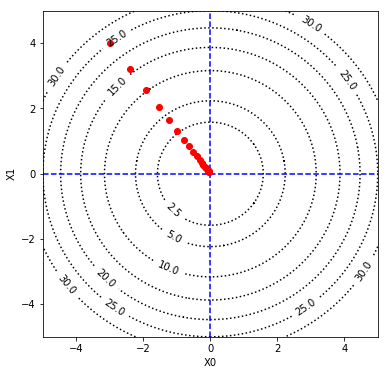

In [92]:
########
# 경사법을 사용한 갱신 과정을 그림으로 표현 (ch04/gradient_method.py)

# 각 step별 x값 이력을 저장하여 반환하는 기능 추가
def gradient_descent2(f, # 최적화하려는 함수
                     init_x, # 초깃값
                     lr=0.01, # 학습률
                     step_num=100, # 경사법에 따른 반복 횟수
                    ):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x) # 함수의 기울기 계산
        x -= lr * grad # 기울기 * 학습률로 값 갱신
        
    x_history.append(x.copy()) # 마지막에 갱신된 값 추가
    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent2(function_2, init_x, lr=0.1, step_num=20)

plt.figure(figsize=(6,6))

# 등고선 그리기 추가
xx = np.linspace(-5, 5, 101)
yy = np.linspace(-5, 5, 101)

X, Y = np.meshgrid(xx, yy)
X = X.flatten()
Y = Y.flatten()
Z = function_2(np.array([X, Y]))

X = X.reshape(len(xx), len(yy))
Y = Y.reshape(len(xx), len(yy))
Z = Z.reshape(len(xx), len(yy))

CS = plt.contour(X, Y, Z, [2.5,5,10,15,20,25,30], colors='k', linestyles=':')
plt.clabel(CS, inline=1, use_clabeltext=True, fmt='%.1f')


plt.plot([-5, 5], [0, 0], '--b')
plt.plot([0, 0], [-5, 5], '--b')
plt.plot(x_history[:, 0], x_history[:, 1], 'ro')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [94]:
########
# 학습률이 너무 크거나 작으면 좋은 결과 얻을 수 없다

# 학습률이 너무 큰 예: lr=10.0 --> 큰 값으로 발산
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, lr=10.0, step_num=100))

# 학습률이 너무 작은 예: lr=1e-10 --> 거의 갱신되지 않은채 끝남
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


### 4.4.2 신경망에서의 기울기
* 가중치 행렬 W 에 대해 각 원소에 대한 편미분 계산
 - 각 위치별 편미분 결과를 이용해 해당 원소를 조금 변경할때 손실 함수가 얼마나 변화하는지를 계산

In [110]:
#######
# 간단한 신경망의 예로 실제 기울기 구하는 코드 구현 (ch04/gradient_simplenet.py 참고)

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from src.common.functions import softmax, cross_entropy_error
from src.common.gradient import numerical_gradient

# 형상이 2x3 (입력: 2차원, 출력: 3차원)인 신경망 클래스
class simpleNet:
    def __init__(self):
        #self.W = np.random.randn(2,3) # 정규분포로 초기화
        # (응용) 교재에 나온대로 결과값을 따라가기 위해 교재의 초기화값 이용 
        self.W = np.array([[0.47355232, 0.99773930, 0.84668094],
                           [0.85557411, 0.03563661, 0.69422093]])

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [157]:
########
# simpleNet을 랜덤으로 초기화한 상태에서 특정 입력값(x, 2차원)에 대해 출력값(p: 3차원)을 산출 

np.random.seed(0) # 재현가능용 seed 고정

net = simpleNet() # 신경망 인스턴스 초기화
print("초기화된 가중치 매개변수")
print(net.W) # 가중치 매개변수 출력

x = np.array([0.6, 0.9])
p = net.predict(x) # 초기화된 가중치값에 의한 예측값(3차원)) 계산
print("초기 예측값:", p)
print("최대값의 인덱스: ", np.argmax(p))

초기화된 가중치 매개변수
[[0.47355232 0.9977393  0.84668094]
 [0.85557411 0.03563661 0.69422093]]
초기 예측값: [1.05414809 0.63071653 1.1328074 ]
최대값의 인덱스:  2


In [165]:
########
# 위 입력에 대한 정답 레이블(학습 목표)이 주어질 때, 손실 함수를 통해 가중치 매개변수의 기울기를 계산할 수 있다

# 참고: 
# 현재 설정된 가중치 매개변수 값(net.W, 2차원 배열)에 대해 
# 손실함수(net.loss(x,t))에서의 기울기 계산을 위해
# 위에서 계산한 함수꼴(f: 함수, net.W: 함수 f의 인수)과 같은 numerical_gradient 함수를 사용
#
# 이를 위해 추가 처리
# (1) net.W(x)에 대한 net.loss(f(x))값을 f(x)형태로 만들기 위해 새로운 함수 정의 (lambda 문법 사용)
# (2) 다차원 배열의 가중치 매개변수를 기울기 계산 대상함수의 입력으로 사용할 수 있도록 numerical_gradient 함수 업데이트


# 다차원 배열 입력을 지원하는 numerical_gradient (common/gradient.py 참고)
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    # np.nditer: 다차원 배열에 대한 iterator 생성 
    # (flags=한 번 iteration할때 tuple형태의 multi index를 index로 반환)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    print(it.shape)
    while not it.finished:
        idx = it.multi_index
        print('iteraction:', idx)
        tmp_val = x[idx] # 하나의 index 대신 multi-index로 들어가는 것만 다르고 나머지는 앞과 똑같음
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
        it.iternext() # 다음 iteration 진행
        
    return grad

t = np.array([0, 0, 1]) # 정답 레이블 (위 신경망의 학습 목표)

# f: 신경망이 정의한 손실함수를 앞에서 만든 numerical_gradient의 함수 형태로 표현
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print("각 가중치별 기울기")
print(dW)

(2, 3)
iteraction: (0, 0)
iteraction: (0, 1)
iteraction: (0, 2)
iteraction: (1, 0)
iteraction: (1, 1)
iteraction: (1, 2)
각 가중치별 기울기
[[ 0.21924757  0.14356243 -0.36281   ]
 [ 0.32887136  0.21534364 -0.544215  ]]


### 4.5 학습 알고리즘 구현하기

#### 신경망 학습(확률적 경사 하강법, stochastic gradient descent)의 절차
* 1단계 - 미니배치: 훈련 데이터 중 일부를 무작위로 가져옴
* 2단계 - 기울기 산출: 미니배치(데이터)에 대한 손실 함수 값을 줄이기 위한 각 가중치 매개변수 별 기울기 계산
* 3단계 - 매개변수 갱신: 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
* 4단계 - 반복: 1~3단계를 반복
---

* 2층 신경망 대상으로 MNIST 데이터셋을 사용하여 학습 수행 

In [127]:
# 4.5.1 2층 신경망 클래스 구현하기

########
# 2층 신경망을 하나의 클래스로 구현 (ch04/two_layer_net.py 참고)

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
#from common.functions import * # <-- 그닥 좋지 않은 import 방식
from src.common.functions import softmax, cross_entropy_error, sigmoid, sigmoid_grad
from src.common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [119]:
np.random.seed(0) # 재현가능용 seed 고정

net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) # (784,100)
print(net.params['b1'].shape) # (100,)
print(net.params['W2'].shape) # (100,10)
print(net.params['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


In [122]:
x = np.random.rand(100,784) # 더미 입력 데이터 (100장 분량)
y = net.predict(x) # 더미에 입력에 대해 현재 설정된 가중치 매개변수로 예측값 산출
print(y.shape)

(100, 10)


In [124]:
%%time
x = np.random.rand(100,784) # 더미 입력 데이터 (100장 분량)
t = np.random.rand(100, 10) # 더미 정답 레이블 (100장 분량)

# 참고: 다음장의 오차역전파법을 쓰면 더 빨리 계산 가능
grad = net.numerical_gradient(x, t) # 기울기 계산

print(grad['W1'].shape) # (784,100)
print(grad['b1'].shape) # (100,)
print(grad['W2'].shape) # (100,10)
print(grad['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)
CPU times: user 3min 26s, sys: 1.93 s, total: 3min 28s
Wall time: 52.4 s


In [128]:
%%time
x = np.random.rand(100,784) # 더미 입력 데이터 (100장 분량)
t = np.random.rand(100, 10) # 더미 정답 레이블 (100장 분량)

# 참고: 다음장의 오차역전파법을 쓰면 더 빨리 계산 가능
grad = net.gradient(x, t) # 기울기 계산

print(grad['W1'].shape) # (784,100)
print(grad['b1'].shape) # (100,)
print(grad['W2'].shape) # (100,10)
print(grad['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)
CPU times: user 11.2 ms, sys: 4.08 ms, total: 15.3 ms
Wall time: 6.25 ms


In [142]:
%%time
# 4.5.2 미니배치 학습 구현하기 (ch04/train_neuralnet.py 참고)

import numpy as np
from src.dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

np.random.seed(0) # 재현가능용 seed 고정

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

x_train = x_train[0:100,:]
t_train = t_train[0:100,:]

train_loss_list = []

# 하이퍼파라미터
iters_num = 10 # 반복 횟수를 적절히 설정한다. (교재 10000을 100으로 줄이자)
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    if (i + 1) % 1 == 0:
        print('.', end='')
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산 (numerical_gradient로 하면 많이 느릴 예정)
    grad = network.numerical_gradient(x_batch, t_batch)
    #grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

print()

..........
CPU times: user 16min 26s, sys: 9.79 s, total: 16min 36s
Wall time: 4min 10s


=> 60000개중 100개만 학습데이터로, iteration을 10회로 줄여도 어마어마하게 느리다

In [144]:
%%time
# 4.5.2 미니배치 학습 구현하기 (ch04/train_neuralnet.py 참고)

import numpy as np
from src.dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

np.random.seed(0) # 재현가능용 seed 고정

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# x_train = x_train[0:100,:]
# t_train = t_train[0:100,:]

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    if (i + 1) % 100 == 0:
        print('.', end='')
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산 (numerical_gradient로 하면 많이 느릴 예정)
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 다음 스터디때 배울 내용이지만 속도 차원에서 미리 쓰자
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

print()

....................................................................................................
CPU times: user 48.8 s, sys: 705 ms, total: 49.5 s
Wall time: 12.7 s


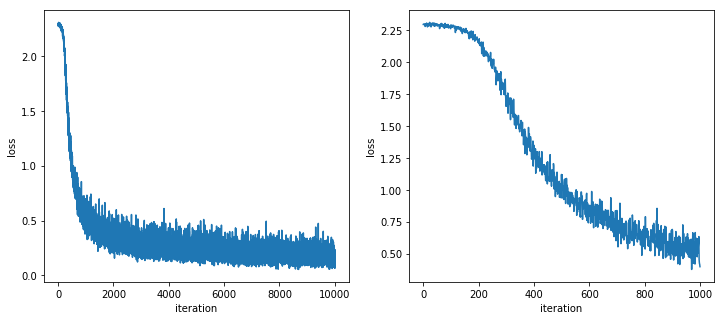

In [147]:
plt.subplots(1, 2, figsize=(12,5))

plt.subplot(121)
iteration = np.arange(iters_num)
plt.plot(iteration, train_loss_list)
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(122)
plt.plot(iteration[:1000], train_loss_list[:1000])
plt.xlabel('iteration')
plt.ylabel('loss')

plt.show()

### 4.5.3 시험 데이터로 평가하기
* 오버피팅되지 않는 범용 능력을 평가하기 위해 훈련 데이터에 미포함된 시험 데이터를 대상으로 정확도를 기록
* 여기서는 1에폭별로 훈련 데이터/시험 데이터별 정확도를 기록
* 에폭(epoch): 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당
 - 예: 훈련 데이터 10,000개를 100개의 미니배치로 학습할 경우, 확률적 경사 하강법을 100회 반복하면 모든 훈련 데이터를 '소진' --> 100회가 1에폭

In [153]:
%%time
# 4.5.2 미니배치 학습 구현하기 (ch04/train_neuralnet.py 참고)

import numpy as np
from src.dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet

np.random.seed(0) # 재현가능용 seed 고정

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# x_train = x_train[0:100,:]
# t_train = t_train[0:100,:]

train_loss_list = []
train_acc_list = [] # 성능 평가용 추가
test_acc_list = [] # 성능 평가용 추가

# 1에폭당 반복 수 (# 성능 평가용 추가)
iter_per_epoch = max(train_size / batch_size, 1)

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    #if (i + 1) % 100 == 0:
    #    print('.', end='')
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산 (numerical_gradient로 하면 많이 느릴 예정)
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 다음 스터디때 배울 내용이지만 속도 차원에서 미리 쓰자
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("epoch#%03d: train acc, test acc | %.4f, %.4f" % (i // iter_per_epoch, train_acc, test_acc))
#print()

epoch#000: train acc, test acc | 0.0992, 0.1009
epoch#001: train acc, test acc | 0.7823, 0.7915
epoch#002: train acc, test acc | 0.8790, 0.8814
epoch#003: train acc, test acc | 0.9000, 0.9016
epoch#004: train acc, test acc | 0.9094, 0.9115
epoch#005: train acc, test acc | 0.9153, 0.9163
epoch#006: train acc, test acc | 0.9206, 0.9222
epoch#007: train acc, test acc | 0.9244, 0.9263
epoch#008: train acc, test acc | 0.9274, 0.9290
epoch#009: train acc, test acc | 0.9307, 0.9318
epoch#010: train acc, test acc | 0.9345, 0.9360
epoch#011: train acc, test acc | 0.9377, 0.9377
epoch#012: train acc, test acc | 0.9401, 0.9404
epoch#013: train acc, test acc | 0.9423, 0.9418
epoch#014: train acc, test acc | 0.9442, 0.9430
epoch#015: train acc, test acc | 0.9467, 0.9454
epoch#016: train acc, test acc | 0.9481, 0.9468
CPU times: user 1min 7s, sys: 3.59 s, total: 1min 11s
Wall time: 18.1 s


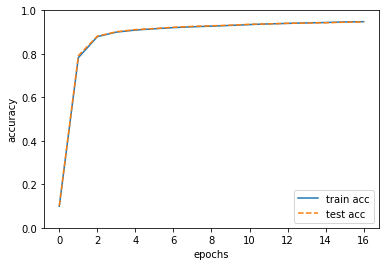

In [154]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 4.6 정리
* 신경망 학습은 손실 함수를 지표로,
* 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신
* 수치 미분을 이용해 가중치 매개변수의 기울기를 구함
* 수치 미분은 구현은 간단하나 계산에 시간이 걸림
 - 다음 장의 오차역전파법은 기울기를 고속으로 구할 수 있음